In [1]:
library(rvest)
library(polite)
library(tidyverse)
library(ggplot2)
library(scales)
library(dplyr)
library(forcats)
library(magrittr)
library(readr)
library(stringr)
library(lubridate)
library(purrr)
library(readxl)
library(png)
library(jpeg)
library(ggimage)
library(xml2)
library(rsvg)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, 

ERROR: Error in library(ggimage): there is no package called ‘ggimage’


In [92]:
URL1 <- 'https://www.nfl.com/standings/league/2021/REG'
HTML_DOC1 <- rvest::read_html(x = URL1)
NFL_2021 <- HTML_DOC1 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL2 <- 'https://www.nfl.com/standings/league/2020/REG'
HTML_DOC2 <- rvest::read_html(x = URL2)
NFL_2020 <- HTML_DOC2 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL3 <- 'https://www.nfl.com/standings/league/2019/REG'
HTML_DOC3 <- rvest::read_html(x = URL3)
NFL_2019 <- HTML_DOC3 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL4 <- 'https://www.nfl.com/standings/league/2018/REG'
HTML_DOC4 <- rvest::read_html(x = URL4)
NFL_2018 <- HTML_DOC4 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL5 <- 'https://www.nfl.com/standings/league/2017/REG'
HTML_DOC5 <- rvest::read_html(x = URL5)
NFL_2017 <- HTML_DOC5 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL6 <- 'https://www.nfl.com/standings/league/2016/REG'
HTML_DOC6 <- rvest::read_html(x = URL6)
NFL_2016 <- HTML_DOC6 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL7 <- 'https://www.nfl.com/standings/league/2015/REG'
HTML_DOC7 <- rvest::read_html(x = URL7)
NFL_2015 <- HTML_DOC7 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL8 <- 'https://www.nfl.com/standings/league/2014/REG'
HTML_DOC8 <- rvest::read_html(x = URL8)
NFL_2014 <- HTML_DOC8 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL9 <- 'https://www.nfl.com/standings/league/2013/REG'
HTML_DOC9 <- rvest::read_html(x = URL9)
NFL_2013 <- HTML_DOC9 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL10 <- 'https://www.nfl.com/standings/league/2012/REG'
HTML_DOC10 <- rvest::read_html(x = URL10)
NFL_2012 <- HTML_DOC1 %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()

URL_curr <- 'https://www.nfl.com/standings/league/2022/REG'
HTML_DOC_curr <- rvest::read_html(x = URL_curr)
NFL_2022 <- HTML_DOC_curr %>% rvest::html_elements('.d3-o-table--horizontal-scroll .d3-o-table') %>% rvest::html_table()


In [106]:
NFL_2022_stand <- as.data.frame(NFL_2022)
NFL_2022_stand <- NFL_2022_stand %>% mutate(Team = str_extract(string = NFL.Team, pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2022)
NFL_2022_stand <- NFL_2022_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2021_stand <- as.data.frame(NFL_2021)
NFL_2021_stand <- NFL_2021_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2021)
NFL_2021_stand <- NFL_2021_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2020_stand <- as.data.frame(NFL_2020)
NFL_2020_stand <- NFL_2020_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2020)
NFL_2020_stand <- NFL_2020_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2019_stand <- as.data.frame(NFL_2019)
NFL_2019_stand <- NFL_2019_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2019)
NFL_2019_stand <- NFL_2019_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2018_stand <- as.data.frame(NFL_2018)
NFL_2018_stand <- NFL_2018_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2018)
NFL_2018_stand <- NFL_2018_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2017_stand <- as.data.frame(NFL_2017)
NFL_2017_stand <- NFL_2017_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2017)
NFL_2017_stand <- NFL_2017_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2016_stand <- as.data.frame(NFL_2016)
NFL_2016_stand <- NFL_2016_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2016)
NFL_2016_stand <- NFL_2016_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)

NFL_2015_stand <- as.data.frame(NFL_2015)
NFL_2015_stand <- NFL_2015_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2015)
NFL_2015_stand <- NFL_2015_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played,Year)

NFL_2014_stand <- as.data.frame(NFL_2014)
NFL_2014_stand <- NFL_2014_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2014)
NFL_2014_stand <- NFL_2014_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played,Year)

NFL_2013_stand <- as.data.frame(NFL_2013)
NFL_2013_stand <- NFL_2013_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2013)
NFL_2013_stand <- NFL_2013_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played,Year)

NFL_2012_stand <- as.data.frame(NFL_2012)
NFL_2012_stand <- NFL_2012_stand %>% mutate(Team = str_extract(string = NFL.Team,  pattern = '[ 0-9a-zA-Z]+[a-z]+(?=[0-9A-Z])'),Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer((str_extract(string = Home, pattern = '(?<= - )[0-9]+'))),
                   Road_Wins = as.integer(str_extract(string = Road, pattern = '[0-9]+')), Road_Losses = as.integer((str_extract(string = Road, pattern = '(?<= - )[0-9]+'))),
                   Div_Wins = as.integer(str_extract(string = Div, pattern = '[0-9]+')), Div_Losses = as.integer((str_extract(string = Div, pattern = '(?<= - )[0-9]+'))),
                   Conf_Wins = as.integer(str_extract(string = Conf, pattern = '[0-9]+')), Conf_Losses = as.integer((str_extract(string = Conf, pattern = '(?<= - )[0-9]+'))), Games_Played = W + T + L, Year = 2012)
NFL_2012_stand <- NFL_2012_stand %>% select(Team, W, L, T, PCT, PF, PA, Home_Wins, Home_Losses, Road_Wins, Road_Losses, Div_Wins, Div_Losses, Conf_Wins, Conf_Losses, Games_Played, Year)


In [105]:
NFL_2012_stand

Team,W,L,T,PCT,PF,PA,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Div_Wins,Div_Losses,Conf_Wins,Conf_Losses,Games_Played,Year
<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Detroit Lions,3,13,1,0.206,325,467,3,5,0,8,2,4,3,9,17,2012
Jacksonville Jaguars,3,14,0,0.176,253,457,3,6,0,8,1,5,3,9,17,2012
Houston Texans,4,13,0,0.235,280,452,2,7,2,6,3,3,4,8,17,2012
New York Giants,4,13,0,0.235,258,416,3,5,1,8,1,5,3,9,17,2012
New York Jets,4,13,0,0.235,310,504,3,6,1,7,0,6,4,8,17,2012
Carolina Panthers,5,12,0,0.294,304,404,2,6,3,6,2,4,3,9,17,2012
Chicago Bears,6,11,0,0.353,311,407,3,5,3,6,2,4,4,8,17,2012
Atlanta Falcons,7,10,0,0.412,313,459,2,6,5,4,2,4,4,8,17,2012
Denver Broncos,7,10,0,0.412,335,322,4,5,3,5,1,5,3,9,17,2012


In [94]:
NFL_stand <- NFL_2022_stand %>% inner_join(NFL_2021_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2020_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2019_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2018_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2017_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2016_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2015_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2014_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2013_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)

NFL_stand <- NFL_stand %>% inner_join(NFL_2012_stand, by = "Team") %>% mutate(W = W.x + W.y, L = L.x + L.y, T = T.x + T.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Road_Wins = Road_Wins.x + Road_Wins.y, Road_Losses = Road_Losses.x + Road_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, Games_Played = Games_Played.x + Games_Played.y)
NFL_stand <- NFL_stand %>% mutate(PCT = (W + (T*.5))/Games_Played)
NFL_stand <- NFL_stand %>% select(Team,W,L,T,Home_Wins,Home_Losses,Road_Wins,Road_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,PCT,Games_Played)



In [107]:
NFL_stand <- bind_rows(NFL_2022_stand,NFL_2021_stand,NFL_2020_stand,NFL_2019_stand,NFL_2018_stand,NFL_2017_stand,NFL_2016_stand,NFL_2015_stand,NFL_2014_stand,NFL_2013_stand,NFL_2012_stand )

In [114]:
NFL_stand %>% group_by(Year) %>%
  summarize(win_perc = sum(Home_Wins) / sum(Home_Wins + Home_Losses) * 100) 

Year,win_perc
<dbl>,<dbl>
2012,51.66052
2013,60.00000
2014,56.86275
2015,53.90625
2016,57.87402
2017,56.64062
2018,60.23622
2019,51.76471
2020,49.80392


In [2]:
#
URL1_nba <- 'https://www.covers.com/sport/basketball/nba/standings'
HTML_DOC1_nba <- rvest::read_html(x = URL1_nba)
NBA_2022 <- HTML_DOC1_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL2_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2021-2022'
HTML_DOC2_nba <- rvest::read_html(x = URL2_nba)
NBA_2021 <- HTML_DOC2_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL3_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2020-2021'
HTML_DOC3_nba <- rvest::read_html(x = URL3_nba)
NBA_2020 <- HTML_DOC3_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL4_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2019-2020'
HTML_DOC4_nba <- rvest::read_html(x = URL4_nba)
NBA_2019 <- HTML_DOC4_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL5_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2018-2019'
HTML_DOC5_nba <- rvest::read_html(x = URL5_nba)
NBA_2018 <- HTML_DOC5_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL6_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2017-2018'
HTML_DOC6_nba <- rvest::read_html(x = URL6_nba)
NBA_2017 <- HTML_DOC6_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL7_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2016-2017'
HTML_DOC7_nba <- rvest::read_html(x = URL7_nba)
NBA_2016 <- HTML_DOC7_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL8_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2015-2016'
HTML_DOC8_nba <- rvest::read_html(x = URL8_nba)
NBA_2015 <- HTML_DOC8_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL9_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2014-2015'
HTML_DOC9_nba <- rvest::read_html(x = URL9_nba)
NBA_2014 <- HTML_DOC9_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL10_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2013-2014'
HTML_DOC10_nba <- rvest::read_html(x = URL10_nba)
NBA_2013 <- HTML_DOC10_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()

URL11_nba <- 'https://www.covers.com/sport/basketball/nba/standings/2012-2013'
HTML_DOC11_nba <- rvest::read_html(x = URL11_nba)
NBA_2012 <- HTML_DOC11_nba %>% rvest::html_elements('.tab-content') %>% rvest::html_table()






In [16]:
#NBA cleaning
NBA_2022 <- as.data.frame(NBA_2022)
NBA_2022_standings <- NBA_2022 %>% filter(row(NBA_2022) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2022_stand <- NBA_2022_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2022_stand <- NBA_2022_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2022_stand <- NBA_2022_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2022_stand <- NBA_2022_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2022_stand <- NBA_2022_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2021 <- as.data.frame(NBA_2021)
NBA_2021_standings <- NBA_2021 %>% filter(row(NBA_2021) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2021_stand <- NBA_2021_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2021_stand <- NBA_2021_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2021_stand <- NBA_2021_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2021_stand <- NBA_2021_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2021_stand <- NBA_2021_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2020 <- as.data.frame(NBA_2020)
NBA_2020_standings <- NBA_2020 %>% filter(row(NBA_2020) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2020_stand <- NBA_2020_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2020_stand <- NBA_2020_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2020_stand <- NBA_2020_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')), O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2020_stand <- NBA_2020_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2020_stand <- NBA_2020_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2019 <- as.data.frame(NBA_2019)
NBA_2019_standings <- NBA_2019 %>% filter(row(NBA_2019) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2019_stand <- NBA_2019_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2019_stand <- NBA_2019_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2019_stand <- NBA_2019_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')), O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2019_stand <- NBA_2019_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2019_stand <- NBA_2019_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2018 <- as.data.frame(NBA_2018)
NBA_2018_standings <- NBA_2018 %>% filter(row(NBA_2018) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2018_stand <- NBA_2018_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2018_stand <- NBA_2018_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2018_stand <- NBA_2018_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')), O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2018_stand <- NBA_2018_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2018_stand <- NBA_2018_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2017 <- as.data.frame(NBA_2017)
NBA_2017_standings <- NBA_2017 %>% filter(row(NBA_2017) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2017_stand <- NBA_2017_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2017_stand <- NBA_2017_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2017_stand <- NBA_2017_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2017_stand <- NBA_2017_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2017_stand <- NBA_2017_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2016 <- as.data.frame(NBA_2016)
NBA_2016_standings <- NBA_2016 %>% filter(row(NBA_2016) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2016_stand <- NBA_2016_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2016_stand <- NBA_2016_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2016_stand <- NBA_2016_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2016_stand <- NBA_2016_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2016_stand <- NBA_2016_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2015 <- as.data.frame(NBA_2015)
NBA_2015_standings <- NBA_2015 %>% filter(row(NBA_2015) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2015_stand <- NBA_2015_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2015_stand <- NBA_2015_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2015_stand <- NBA_2015_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2015_stand <- NBA_2015_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2015_stand <- NBA_2015_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2014 <- as.data.frame(NBA_2014)
NBA_2014_standings <- NBA_2014 %>% filter(row(NBA_2014) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2014_stand <- NBA_2014_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2014_stand <- NBA_2014_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2014_stand <- NBA_2014_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2014_stand <- NBA_2014_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2014_stand <- NBA_2014_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2013 <- as.data.frame(NBA_2013)
NBA_2013_standings <- NBA_2013 %>% filter(row(NBA_2013) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2013_stand <- NBA_2013_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2013_stand <- NBA_2013_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2013_stand <- NBA_2013_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9]+')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')),O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2013_stand <- NBA_2013_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2013_stand <- NBA_2013_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

NBA_2012 <- as.data.frame(NBA_2012)
NBA_2012_standings <- NBA_2012 %>% filter(row(NBA_2012) < 38) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'NBA')) %>% filter(!str_detect(string = Eastern.Conference, pattern = 'Conference'))
NBA_2012_stand <- NBA_2012_standings %>% rename(Team = Eastern.Conference, Wins = Var.2, Losses = Var.3, Percentage = Var.4, Home = Var.5, Away = Var.6, Conference = Var.7, Division = Var.8, ATS = Var.9, O_U = Var.10)
NBA_2012_stand <- NBA_2012_stand %>% select(Team, Wins, Losses, Home, Away, Percentage, Conference, Division, ATS, O_U)   
NBA_2012_stand <- NBA_2012_stand %>% mutate(Home_Wins = as.integer(str_extract(string = Home, pattern = '[0-9+]')), Home_Losses = as.integer(str_extract(string = Home, pattern = '(?<=-)[0-9]+')),Away_Wins = as.integer(str_extract(string = Away, pattern = '[0-9]+')), Away_Losses = as.integer(str_extract(string = Away, pattern = '(?<=-)[0-9]+')),
                         Conf_Wins = as.integer(str_extract(string = Conference, pattern = '[0-9]+')), Conf_Losses = as.integer(str_extract(string = Conference, pattern = '(?<=-)[0-9]+')), Div_Wins = as.integer(str_extract(string = Division, pattern = '[0-9]+')), Div_Losses = as.integer(str_extract(string = Division, pattern = '(?<=-)[0-9]+')),
                         ATS_Wins = as.integer(str_extract(string = ATS, pattern = '[0-9]+')), ATS_Losses = as.integer(str_extract(string = ATS, pattern = '(?<=-)[0-9]+')), O_U_Wins = as.integer(str_extract(string = O_U, pattern = '[0-9]+')), O_U_Losses = as.integer(str_extract(string = O_U, pattern = '(?<=-)[0-9]+')))
NBA_2012_stand <- NBA_2012_stand %>% mutate(Wins = as.integer(Wins), Losses = as.integer(Losses), Percentage = as.double(Percentage))
NBA_2012_stand <- NBA_2012_stand %>% mutate(Games_Played = Wins + Losses, Home_Played = Home_Wins + Home_Losses, Away_Played = Away_Wins + Away_Losses)

#bind rows gave me problems
NBA_stand_real <- bind_rows(NBA_2012_stand, NBA_2013_stand, NBA_2014_stand, NBA_2015_stand, NBA_2016_stand, NBA_2017_stand, NBA_2018_stand, NBA_2019_stand, NBA_2020_stand, NBA_2021_stand, NBA_2022_stand)


In [17]:
#joining each year on each other
NBA_stand <- NBA_2022_stand %>% inner_join(NBA_2021_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2020_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2019_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2018_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2017_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2016_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2015_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2014_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2013_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% inner_join(NBA_2012_stand, by = "Team") %>% mutate(Wins = Wins.x + Wins.y, Losses = Losses.x + Losses.y, Home_Wins = Home_Wins.x + Home_Wins.y, Home_Losses = Home_Losses.x + Home_Losses.y,
                                                                                  Away_Wins = Away_Wins.x + Away_Wins.y, Away_Losses = Away_Losses.x + Away_Losses.y, Conf_Wins = Conf_Wins.x + Conf_Wins.y,Conf_Losses = Conf_Losses.x + Conf_Losses.y,
                                                                                  Div_Wins = Div_Wins.x + Div_Wins.y, Div_Losses = Div_Losses.x + Div_Losses.y, ATS_Wins = ATS_Wins.x + ATS_Wins.y, ATS_Losses = ATS_Losses.x + ATS_Losses.y, O_U_Wins = O_U_Wins.x + O_U_Wins.y, O_U_Losses = O_U_Losses.x + O_U_Losses.y,
                                                                                  Games_Played = Games_Played.x + Games_Played.y, Home_Played = Home_Played.x + Home_Played.y, Away_Played = Away_Played.x + Away_Played.y)
NBA_stand <- NBA_stand %>% mutate(Percentage = Wins/Games_Played)
NBA_stand <- NBA_stand %>% select(Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage)

NBA_stand <- NBA_stand %>% mutate(image = case_when(
    Team == "Atlanta" ~ 'https://cdn.nba.com/logos/nba/1610612737/primary/L/logo.svg',
    Team == "Boston" ~ 'https://cdn.nba.com/logos/nba/1610612738/primary/L/logo.svg',
    Team == "Philadelphia" ~ 'https://cdn.nba.com/logos/nba/1610612755/primary/L/logo.svg',
    Team == "Toronto" ~ 'https://cdn.nba.com/logos/nba/1610612761/primary/L/logo.svg',
    Team == "Brooklyn" ~ 'https://cdn.nba.com/logos/nba/1610612751/primary/L/logo.svg',
    Team == "New York" ~ 'https://cdn.nba.com/logos/nba/1610612752/primary/L/logo.svg',
    Team == "Milwaukee" ~ 'https://cdn.nba.com/logos/nba/1610612749/primary/L/logo.svg',
    Team == "Cleveland" ~ 'https://cdn.nba.com/logos/nba/1610612739/primary/L/logo.svg',
    Team == "Indiana" ~ 'https://cdn.nba.com/logos/nba/1610612754/primary/L/logo.svg',
    Team == "Chicago" ~ 'https://cdn.nba.com/logos/nba/1610612741/primary/L/logo.svg',
    Team == "Detroit" ~ 'https://cdn.nba.com/logos/nba/1610612765/primary/L/logo.svg',
    Team == "Miami" ~ 'https://cdn.nba.com/logos/nba/1610612748/primary/L/logo.svg',
    Team == "Washington" ~ 'https://cdn.nba.com/logos/nba/1610612764/primary/L/logo.svg',
    Team == "Charlotte" ~ 'https://cdn.nba.com/logos/nba/1610612766/primary/L/logo.svg',
    Team == "Orlando" ~ 'https://cdn.nba.com/logos/nba/1610612753/primary/L/logo.svg',
    Team == "Denver" ~ 'https://cdn.nba.com/logos/nba/1610612743/primary/L/logo.svg',
    Team == "Minnesota" ~ 'https://cdn.nba.com/logos/nba/1610612750/primary/L/logo.svg',
    Team == "Portland" ~ 'https://cdn.nba.com/logos/nba/1610612757/primary/L/logo.svg',
    Team == "Utah" ~ 'https://cdn.nba.com/logos/nba/1610612762/primary/L/logo.svg',
    Team == "Oklahoma City" ~ 'https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg',
    Team == "Phoenix" ~ 'https://cdn.nba.com/logos/nba/1610612756/primary/L/logo.svg',
    Team == "Sacramento" ~ 'https://cdn.nba.com/logos/nba/1610612758/primary/L/logo.svg',
    Team == "Golden State" ~ 'https://cdn.nba.com/logos/nba/1610612744/primary/L/logo.svg',
    Team == "L.A. Lakers" ~ 'https://cdn.nba.com/logos/nba/1610612747/primary/L/logo.svg',
    Team == "L.A. Clippers" ~ 'https://cdn.nba.com/logos/nba/1610612746/primary/L/logo.svg',
    Team == "New Orleans" ~ 'https://cdn.nba.com/logos/nba/1610612740/primary/L/logo.svg',
    Team == "Memphis" ~ 'https://cdn.nba.com/logos/nba/1610612763/primary/L/logo.svg',
    Team == "Dallas" ~ 'https://cdn.nba.com/logos/nba/1610612742/primary/L/logo.svg',
    Team == "Houston" ~ 'https://cdn.nba.com/logos/nba/1610612745/primary/L/logo.svg',
    Team == "San Antonio" ~ 'https://cdn.nba.com/logos/nba/1610612759/primary/L/logo.svg',
    TRUE ~ 'https://cdn.nba.com/logos/leagues/logo-nba.svg'))
NBA_stand

Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage,image
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
Boston,467,359,238,149,204,210,308,211,93,66,431,377,416,399,826,387,414,0.5653753,https://cdn.nba.com/logos/nba/1610612738/primary/L/logo.svg
Brooklyn,385,443,192,199,169,244,249,273,76,86,409,406,405,411,828,391,413,0.4649758,https://cdn.nba.com/logos/nba/1610612751/primary/L/logo.svg
Philadelphia,368,458,201,190,146,268,236,286,69,92,406,405,405,408,826,391,414,0.4455206,https://cdn.nba.com/logos/nba/1610612755/primary/L/logo.svg
New York,329,491,156,226,145,265,216,300,58,98,404,406,390,421,820,382,410,0.4012195,https://cdn.nba.com/logos/nba/1610612752/primary/L/logo.svg
Toronto,496,330,257,137,220,193,326,196,103,57,428,389,431,389,826,394,413,0.6004843,https://cdn.nba.com/logos/nba/1610612761/primary/L/logo.svg
Milwaukee,445,381,234,161,192,220,292,225,92,67,398,414,422,397,826,395,412,0.5387409,https://cdn.nba.com/logos/nba/1610612749/primary/L/logo.svg
Cleveland,389,431,218,183,158,248,262,258,73,86,371,430,400,411,820,401,406,0.4743902,https://cdn.nba.com/logos/nba/1610612739/primary/L/logo.svg
Indiana,444,383,234,152,183,231,287,232,88,69,414,400,404,413,827,386,414,0.5368803,https://cdn.nba.com/logos/nba/1610612754/primary/L/logo.svg
Chicago,385,433,196,192,167,241,266,250,80,79,390,422,380,427,818,388,408,0.4706601,https://cdn.nba.com/logos/nba/1610612741/primary/L/logo.svg


In [22]:
#NBA HOME WINS
NBA_stand %>% summarize(Total_Home_Wins = sum(Home_Wins), Total_Games = sum(Home_Played), PCT = Total_Home_Wins/Total_Games)

Total_Home_Wins,Total_Games,PCT
<int>,<int>,<dbl>
6450,11683,0.5520842


In [24]:
#NBA ROAD WINS
NBA_stand %>% summarize(Total_Away_Wins = sum(Home_Losses), Total_Games = sum(Home_Played), PCT = Total_Away_Wins/Total_Games)

Total_Away_Wins,Total_Games,PCT
<int>,<int>,<dbl>
5233,11683,0.4479158


In [18]:
#NFL HOME WINS
NFL_stand %>% summarize(Total_Home_Wins = sum(Home_Wins), Total_Games = sum(Home_Wins, Home_Losses), PCT = Total_Home_Wins/Total_Games)

ERROR: Error in summarize(., Total_Home_Wins = sum(Home_Wins), Total_Games = sum(Home_Wins, : object 'NFL_stand' not found


In [13]:
#NFL ROAD WINS
NFL_stand %>% summarize(Total_Away_Wins = sum(Road_Wins), Total_Games = sum(Road_Wins, Road_Losses), PCT = Total_Away_Wins/Total_Games)

Total_Away_Wins,Total_Games,PCT
<int>,<int>,<dbl>
139329,349514,0.3986364


In [9]:
#NBA Home WINS BAR Graph
NBA_stand %>% ggplot(aes(x = Home_wins, y = Away_Wins, color = Team)) %>% geom_point()
 

ERROR: Error: `mapping` must be created by `aes()`
Did you use %>% instead of +?


In [29]:
NBA_stand %>% arrange(Home_Wins) %>% head(3)

,Team,Wins,Losses,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Conf_Wins,Conf_Losses,Div_Wins,Div_Losses,ATS_Wins,ATS_Losses,O_U_Wins,O_U_Losses,Games_Played,Home_Played,Away_Played,Percentage,image
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,New York,329,491,156,226,145,265,216,300,58,98,404,406,390,421,820,382,410,0.4012195,https://cdn.nba.com/logos/nba/1610612752/primary/L/logo.svg
2,Orlando,282,546,161,242,110,304,176,343,54,104,386,426,399,417,828,403,414,0.3405797,https://cdn.nba.com/logos/nba/1610612753/primary/L/logo.svg
3,Sacramento,322,502,166,227,138,275,188,327,63,97,397,407,413,402,824,393,413,0.3907767,https://cdn.nba.com/logos/nba/1610612758/primary/L/logo.svg


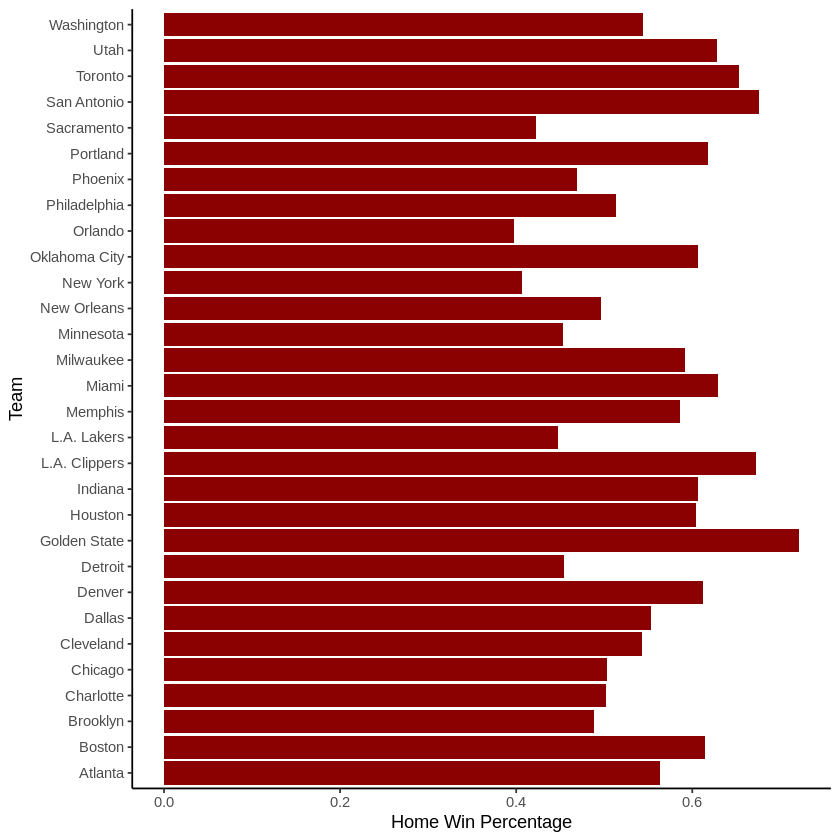

In [35]:
NBA_stand %>% ggplot(aes(x = Team, y = Home_Wins/Home_Played )) +  geom_bar(stat = 'identity', position = position_dodge(), fill = "dark red")+ ylab("Home Win Percentage") + coord_flip()+ theme_classic()

In [87]:
#NBA POINT graph
NBA_graph <- NBA_stand %>% ggplot(aes(x = Away_Wins/ Away_Played , y = Home_Wins/Home_Played, image = image)) + geom_image(size=.1)

In [90]:
NBA_graph <- NBA_graph + ggtitle("NBA Home and Away Percentages") + ylab("Home Win Percentage") + xlab("Away Win Percentage")  + theme(text=element_text(family="Times New Roman", face="bold", size=10))  + theme_bw()

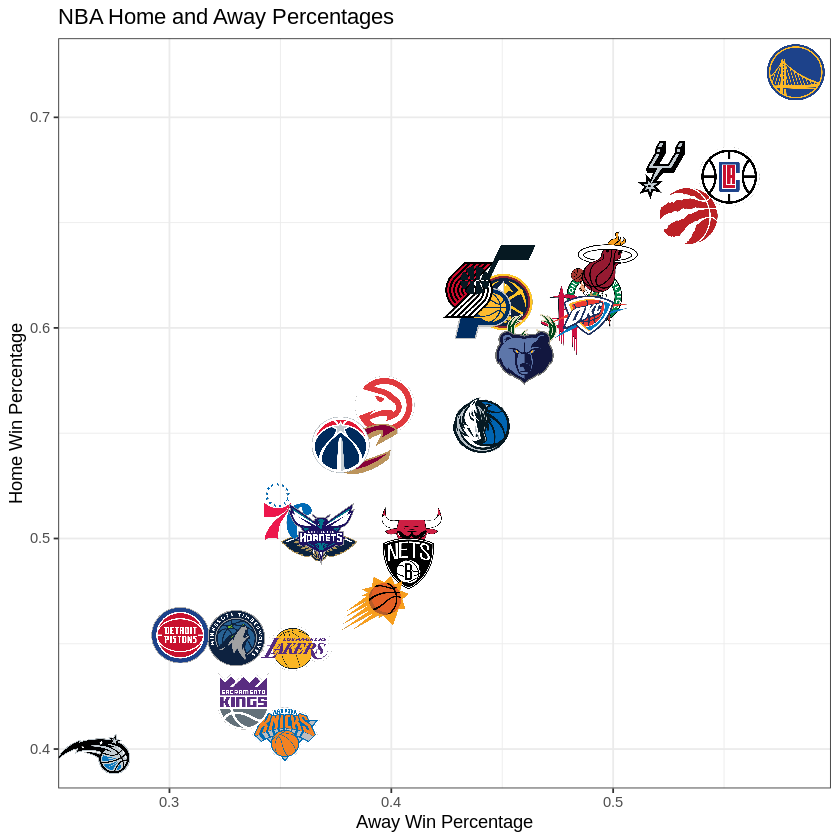

In [91]:
NBA_graph

In [52]:
celtics <- readPNG('https://w7.pngwing.com/pngs/38/763/png-transparent-boston-celtics-logo-boston-celtics-miami-heat-nba-brooklyn-nets-logo-celtics-nba-food-sport-fictional-character-thumbnail.png')

ERROR: Error in readPNG("https://w7.pngwing.com/pngs/38/763/png-transparent-boston-celtics-logo-boston-celtics-miami-heat-nba-brooklyn-nets-logo-celtics-nba-food-sport-fictional-character-thumbnail.png"): unable to open https://w7.pngwing.com/pngs/38/763/png-transparent-boston-celtics-logo-boston-celtics-miami-heat-nba-brooklyn-nets-logo-celtics-nba-food-sport-fictional-character-thumbnail.png


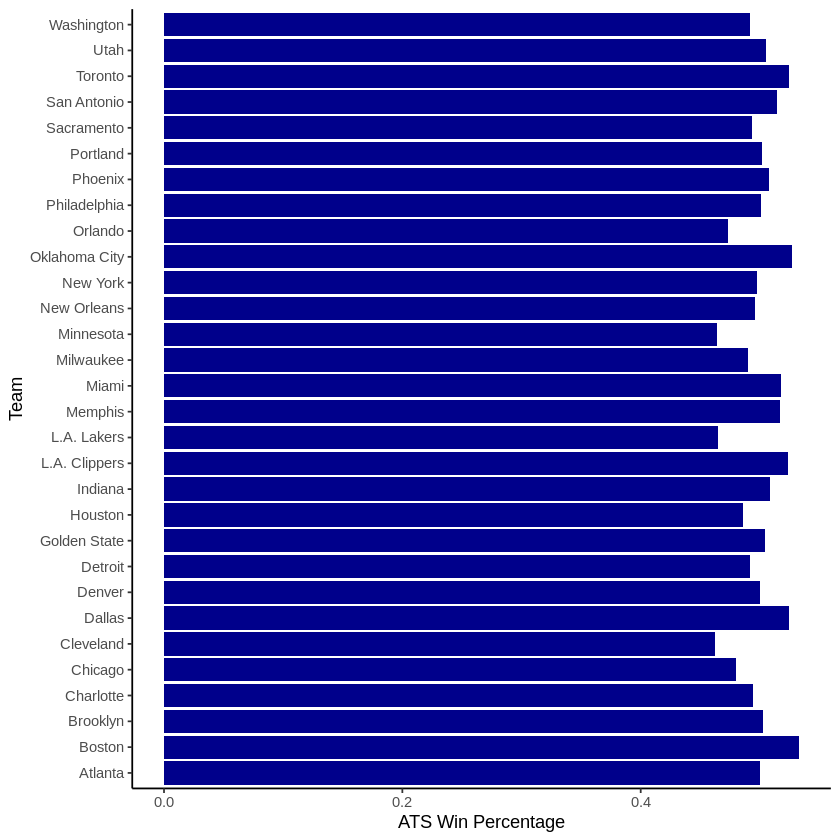

In [36]:
#NBA ATS model
NBA_stand %>% ggplot(aes(x = Team, y = ATS_Wins/(ATS_Wins+ATS_Losses))) +  ylab("ATS Win Percentage") + geom_bar(stat = 'identity', position = position_dodge(), fill = "dark blue")+coord_flip() + theme_classic()

In [2]:
# NBA Model
 NBA_model <- function(HOME, AWAY){
    home <- NBA_stand %>% filter(Team == HOME);
    away <- NBA_stand %>% filter(Team == AWAY);
    home_stats <- home %>% summarize(home_win_pct = Home_Wins/(Home_Wins + Home_Losses) * 100 , ats_pct = ATS_Wins/(ATS_Wins+ATS_Losses) * 100, PCT = Wins/Games_Played * 100)
    away_stats <- away %>% summarize(away_win_pct = Away_Wins/(Away_Wins + Away_Losses) * 100 , ats_pct = ATS_Wins/(ATS_Wins+ATS_Losses) * 100, PCT = Wins/Games_Played * 100)
    home_2022 <- NBA_2022_stand %>% filter(Team == HOME);
    away_2022 <- NBA_2022_stand %>% filter(Team == AWAY);
    home_2022_stats <- home_2022 %>% summarize(home_win_pct = Home_Wins/(Home_Wins + Home_Losses) * 100 , ats_pct = ATS_Wins/(ATS_Wins+ATS_Losses) * 100, PCT = Wins/Games_Played *100)
    away_2022_stats <- away_2022 %>% summarize(away_win_pct = Away_Wins/(Away_Wins + Away_Losses) * 100 , ats_pct = ATS_Wins/(ATS_Wins+ATS_Losses) * 100, PCT = Wins/Games_Played * 100)
    home_prob_pt1 <- home_stats %>% summarize(past = sum(.075 * home_win_pct, .15 * ats_pct, .075 * PCT))
    home_prob_pt2 <- home_2022_stats %>% summarize(past = sum(.175 * home_win_pct, .35 * ats_pct, .175 * PCT))
    away_prob_pt1 <- away_stats %>% summarize(past = sum(.075 * away_win_pct, .15 * ats_pct, .075 * PCT))
    away_prob_pt2 <- away_2022_stats %>% summarize(past = sum(.175 * away_win_pct, .35 * ats_pct, .175 * PCT))
    home_prob <- home_prob_pt1 + home_prob_pt2
    away_prob <- away_prob_pt1 + away_prob_pt2
    
    if(home_prob >= away_prob){
        return(HOME)
    }else{
        return(AWAY)
    }
    }
NBA_model(HOME = 'Orlando', AWAY = 'Golden State')


ERROR: Error in NBA_stand %>% filter(Team == HOME): could not find function "%>%"


In [38]:
#Difference between home and away win % NBA
NBA_stand %>% summarize(Home = mean(Home_Wins/Home_Played)- mean(Away_Wins/Away_Played))

Home
<dbl>
0.1298917


In [58]:
#adding home and away win % to data set NBA
NBA_stand <- NBA_stand %>% mutate(Home_Percentage = Home_Wins/Home_Played, Away_Percentage = Away_Wins/Away_Played)

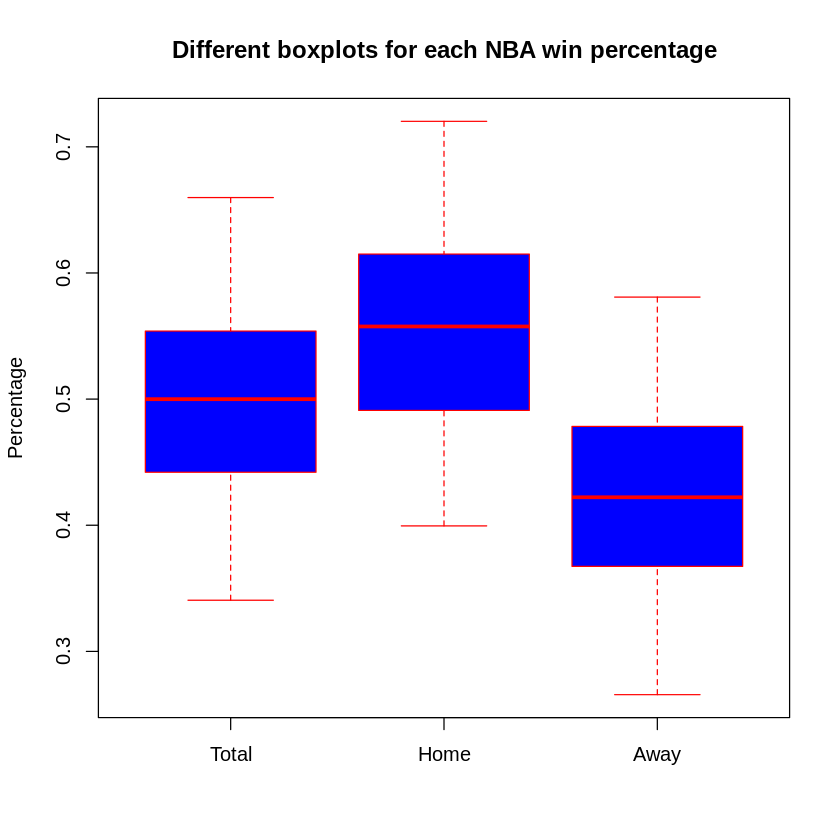

In [64]:
#NBA Win % Boxplot
boxplot(NBA_stand$Percentage, NBA_stand$Home_Percentage, NBA_stand$Away_Percentage,
    main="Different boxplots for each NBA win percentage",
    ylab="Percentage",
    names = c("Total", "Home", "Away"),
    col="blue",
    border="red")